# Cognitive Report 2024

## Data Downloading

In [8]:
# Imports
from tensorflow.keras.datasets import cifar10
from tensorflow.keras import utils
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.optimizers.legacy import SGD, Adam, RMSprop

# importing of service libraries
import numpy as np
import matplotlib.pyplot as plt

print('Libraries imported.')

Libraries imported.


In [9]:
IMG_ROWS = 32
IMG_COLS = 32
IMG_CHANNELS = 3
N_CLASSES = 10

In [15]:
BATCH_SIZE = 128
N_EPOCH = 20 # use 20 for best initial results
VERBOSE = 1
VALIDATION_SPLIT = 0.2
OPTIM = RMSprop()

In [10]:
# Read all of the Necessary Images and add Labels

import os
from PIL import Image
import numpy as np
# Load the iCub Dataset
def load_images_from_folder():
    X = []
    y = []
    for i, f in enumerate(['book', 'cellphone', 'hairbrush', 'hairclip', 'mouse', 'pencilcase', 'perfume', 'ringbinder', 'sunglasses', 'wallet']):
        # Iterate through all files in the folder
        for filename in os.listdir(os.path.join('selected_images/', f)):
            # Check if the file is an image (you may want to add more file extensions)
            if filename.endswith((".jpg")):
                # Build the full path of the image file
                file_path = os.path.join(os.path.join('selected_images/', f), filename)
                # Open the image file
                img = Image.open(file_path)
                # Downsize the Images
                img = img.resize((IMG_ROWS, IMG_COLS))
                # Convert the image to a NumPy array
                img_array = np.array(img)
                X.append(img_array)
                y.append(i)
    return np.array(X), np.array(y)

X, y = load_images_from_folder()
print("Data Downloaded")

Data Downloaded


## Split the Data

In [11]:
# Data Split 80:20
from sklearn.model_selection import train_test_split

# Get the Seperate Sets of Data
input_X_train, input_X_test, output_y_train, output_y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print('input_X_train shape:', input_X_train.shape)
print(input_X_train.shape[0], 'train samples')
print(input_X_test.shape[0], 'test samples')
 
# Tell the model there are 10 classes
output_Y_train = utils.to_categorical(output_y_train, N_CLASSES)
output_Y_test = utils.to_categorical(output_y_test, N_CLASSES) 

# float and normalization
input_X_train = input_X_train.astype('float32')
input_X_test = input_X_test.astype('float32')
input_X_train /= 255
input_X_test /= 255



input_X_train shape: (21362, 32, 32, 3)
21362 train samples
5341 test samples


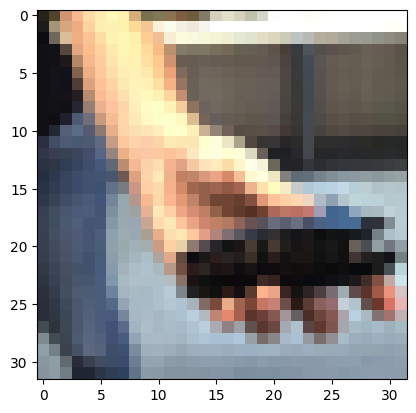

In [12]:
# Visualise an Image
image = input_X_train[2]
plt.imshow(image)
plt.show() 

In [13]:
# network definition

model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same', input_shape=(IMG_ROWS, IMG_COLS, IMG_CHANNELS)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
  
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(N_CLASSES))
model.add(Activation('softmax'))

print('CNN network definition.')

CNN network definition.


In [16]:
# compile the model
model.compile(loss='categorical_crossentropy', optimizer=OPTIM, metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 activation_2 (Activation)   (None, 32, 32, 32)        0         
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 16, 16, 32)        0         
 g2D)                                                            
                                                                 
 dropout_2 (Dropout)         (None, 16, 16, 32)        0         
                                                                 
 flatten_1 (Flatten)         (None, 8192)              0         
                                                                 
 dense_1 (Dense)             (None, 512)               4194816   
                                                      

In [17]:
# Train the Model

history = model.fit(input_X_train, output_Y_train, batch_size=BATCH_SIZE, epochs=N_EPOCH, validation_split=VALIDATION_SPLIT,  verbose=VERBOSE)


Epoch 1/20
134/134 [==============================] - 4s 31ms/step - loss: 1.9999 - accuracy: 0.3111 - val_loss: 1.5702 - val_accuracy: 0.4669
Epoch 2/20
134/134 [==============================] - 4s 30ms/step - loss: 1.4524 - accuracy: 0.4994 - val_loss: 1.2202 - val_accuracy: 0.6003
Epoch 3/20
134/134 [==============================] - 4s 29ms/step - loss: 1.1795 - accuracy: 0.5971 - val_loss: 1.3276 - val_accuracy: 0.5247
Epoch 4/20
134/134 [==============================] - 4s 29ms/step - loss: 0.9870 - accuracy: 0.6595 - val_loss: 0.8722 - val_accuracy: 0.7018
Epoch 5/20
134/134 [==============================] - 4s 30ms/step - loss: 0.8318 - accuracy: 0.7179 - val_loss: 0.8079 - val_accuracy: 0.7227
Epoch 6/20
134/134 [==============================] - 4s 29ms/step - loss: 0.7104 - accuracy: 0.7597 - val_loss: 0.6877 - val_accuracy: 0.7657
Epoch 7/20
134/134 [==============================] - 4s 30ms/step - loss: 0.6138 - accuracy: 0.7953 - val_loss: 0.5967 - val_accuracy: 0.7915

42/42 [==============================] - 0s 8ms/step - loss: 0.4111 - accuracy: 0.8727

Test score/loss: 0.4111451506614685
Test accuracy: 0.8726829886436462
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


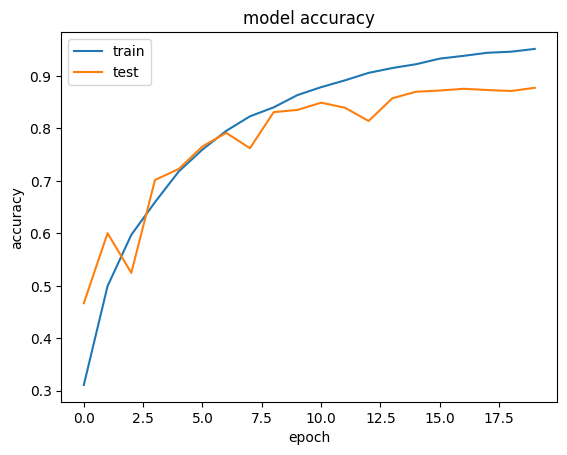

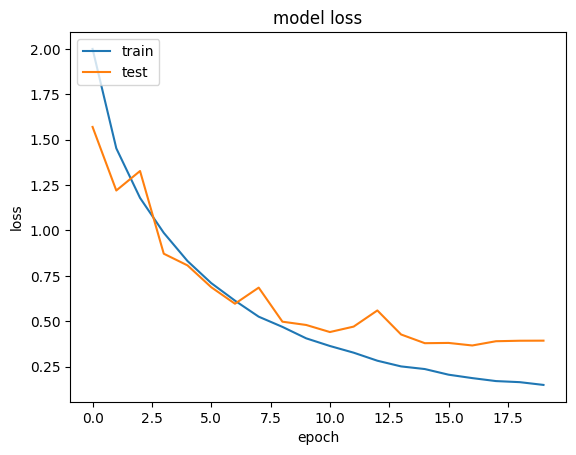

In [18]:
#Testing
score = model.evaluate(input_X_test, output_Y_test, batch_size=BATCH_SIZE, verbose=VERBOSE)
print("\nTest score/loss:", score[0])
print('Test accuracy:', score[1])

# list all data in history
print(history.history.keys())

# summarize history for accuracy
#plt.plot(mo)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


In [21]:
#save model in json format into a file
model_json = model.to_json()
open('icubweights.json', 'w').write(model_json)

#save the trained weights
model.save_weights('icub_weights.h5', overwrite=True)

print('Files saved for model definition and for weights.')

Files saved for model definition and for weights.


## Deeper CNN Model

In [22]:
# REUSE THE SAME INITIALISATION CODE AND THE TRAINING AND TEST DATA SET LOADING OPERATION

N_EPOCH = 40 # 40 bigger network will benefit from extra training epochs

# Complex DNN model definition
model = Sequential()
 
model.add(Conv2D(32, kernel_size=3, padding='same', input_shape=(IMG_ROWS, IMG_COLS, IMG_CHANNELS)))
model.add(Activation('relu'))
model.add(Conv2D(32, kernel_size=3, padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
 
model.add(Conv2D(64, kernel_size=3, padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
 
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(N_CLASSES))
model.add(Activation('softmax'))


#optim = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=OPTIM, metrics=['accuracy'])

model.summary()
 


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 activation_5 (Activation)   (None, 32, 32, 32)        0         
                                                                 
 conv2d_3 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 activation_6 (Activation)   (None, 32, 32, 32)        0         
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 16, 16, 32)        0         
 g2D)                                                            
                                                                 
 dropout_4 (Dropout)         (None, 16, 16, 32)        0         
                                                      

In [23]:
# training/fitting of the complex DNN model 
history = model.fit(input_X_train, output_Y_train, batch_size=BATCH_SIZE, epochs=N_EPOCH, validation_split=VALIDATION_SPLIT,  verbose=VERBOSE)


Epoch 1/40
134/134 [==============================] - 10s 73ms/step - loss: 2.1358 - accuracy: 0.2140 - val_loss: 1.8659 - val_accuracy: 0.3426
Epoch 2/40
134/134 [==============================] - 10s 71ms/step - loss: 1.8061 - accuracy: 0.3587 - val_loss: 1.6221 - val_accuracy: 0.4297
Epoch 3/40
134/134 [==============================] - 9s 69ms/step - loss: 1.6142 - accuracy: 0.4331 - val_loss: 1.4149 - val_accuracy: 0.4872
Epoch 4/40
134/134 [==============================] - 10s 73ms/step - loss: 1.4547 - accuracy: 0.4832 - val_loss: 1.1564 - val_accuracy: 0.5935
Epoch 5/40
134/134 [==============================] - 10s 73ms/step - loss: 1.3136 - accuracy: 0.5351 - val_loss: 1.1754 - val_accuracy: 0.5860
Epoch 6/40
134/134 [==============================] - 9s 67ms/step - loss: 1.2031 - accuracy: 0.5741 - val_loss: 0.9805 - val_accuracy: 0.6445
Epoch 7/40
134/134 [==============================] - 9s 68ms/step - loss: 1.0990 - accuracy: 0.6101 - val_loss: 1.1780 - val_accuracy: 0.

42/42 [==============================] - 1s 19ms/step - loss: 0.2020 - accuracy: 0.9294

Test score/loss: 0.20196275413036346
Test accuracy: 0.9294139742851257
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


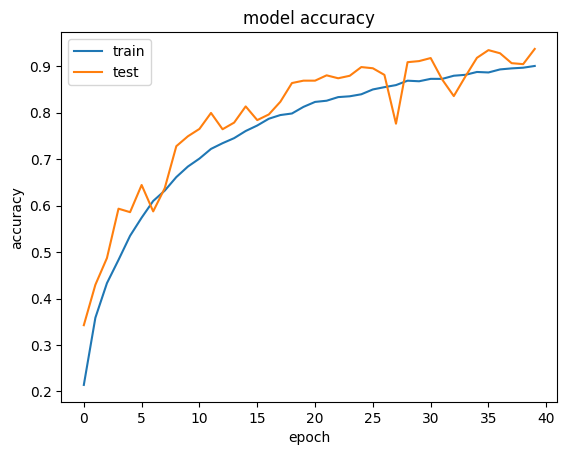

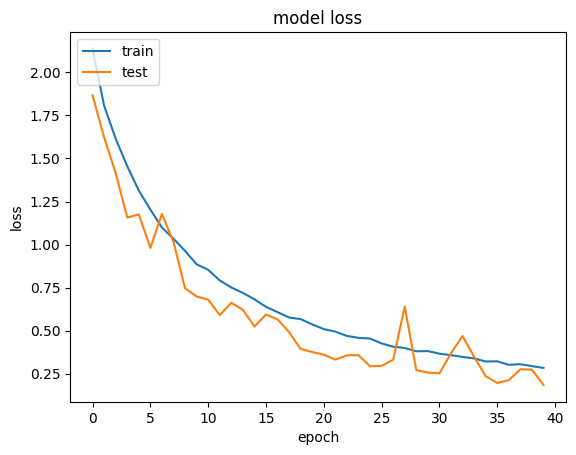

In [24]:
#Testing
score = model.evaluate(input_X_test, output_Y_test, batch_size=BATCH_SIZE, verbose=VERBOSE)
print("\nTest score/loss:", score[0])
print('Test accuracy:', score[1])

# list all data in history
print(history.history.keys())

# summarize history for accuracy
#plt.plot(mo)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [25]:
# SMALLER NUMBER OF EPOCHS

# REUSE THE SAME INITIALISATION CODE AND THE TRAINING AND TEST DATA SET LOADING OPERATION

N_EPOCH = 20

# Complex DNN model definition
model = Sequential()
 
model.add(Conv2D(32, kernel_size=3, padding='same', input_shape=(IMG_ROWS, IMG_COLS, IMG_CHANNELS)))
model.add(Activation('relu'))
model.add(Conv2D(32, kernel_size=3, padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
 
model.add(Conv2D(64, kernel_size=3, padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
 
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(N_CLASSES))
model.add(Activation('softmax'))


#optim = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=OPTIM, metrics=['accuracy'])

model.summary()
 


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 activation_11 (Activation)  (None, 32, 32, 32)        0         
                                                                 
 conv2d_7 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 activation_12 (Activation)  (None, 32, 32, 32)        0         
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 16, 16, 32)        0         
 g2D)                                                            
                                                                 
 dropout_7 (Dropout)         (None, 16, 16, 32)        0         
                                                      

In [26]:
# training/fitting of the complex DNN model 
history = model.fit(input_X_train, output_Y_train, batch_size=BATCH_SIZE, epochs=N_EPOCH, validation_split=VALIDATION_SPLIT,  verbose=VERBOSE)


Epoch 1/20
134/134 [==============================] - 10s 74ms/step - loss: 2.1171 - accuracy: 0.2225 - val_loss: 1.8598 - val_accuracy: 0.3220
Epoch 2/20
134/134 [==============================] - 9s 67ms/step - loss: 1.8147 - accuracy: 0.3491 - val_loss: 1.5732 - val_accuracy: 0.4421
Epoch 3/20
134/134 [==============================] - 9s 65ms/step - loss: 1.6176 - accuracy: 0.4257 - val_loss: 1.3505 - val_accuracy: 0.5153
Epoch 4/20
134/134 [==============================] - 9s 66ms/step - loss: 1.4685 - accuracy: 0.4722 - val_loss: 1.3440 - val_accuracy: 0.5282
Epoch 5/20
134/134 [==============================] - 9s 67ms/step - loss: 1.3409 - accuracy: 0.5258 - val_loss: 1.1392 - val_accuracy: 0.6075
Epoch 6/20
134/134 [==============================] - 9s 68ms/step - loss: 1.2304 - accuracy: 0.5602 - val_loss: 1.1910 - val_accuracy: 0.5663
Epoch 7/20
134/134 [==============================] - 9s 68ms/step - loss: 1.1473 - accuracy: 0.5913 - val_loss: 1.3518 - val_accuracy: 0.531

42/42 [==============================] - 1s 21ms/step - loss: 0.4538 - accuracy: 0.8444

Test score/loss: 0.4537806808948517
Test accuracy: 0.8444111347198486
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


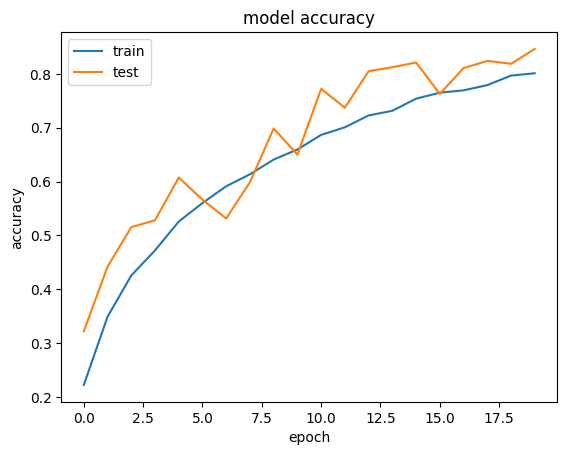

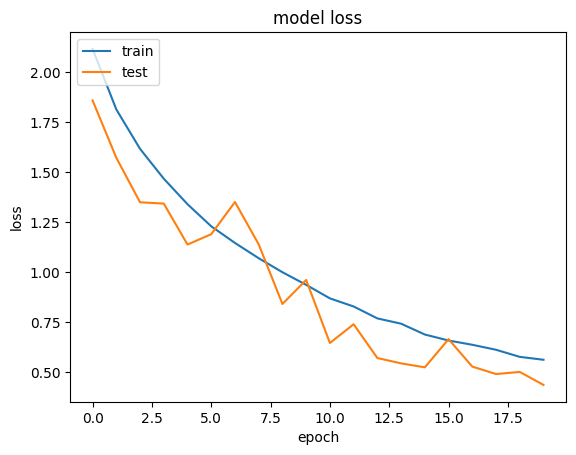

In [27]:
#Testing
score = model.evaluate(input_X_test, output_Y_test, batch_size=BATCH_SIZE, verbose=VERBOSE)
print("\nTest score/loss:", score[0])
print('Test accuracy:', score[1])

# list all data in history
print(history.history.keys())

# summarize history for accuracy
#plt.plot(mo)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [28]:
# HIGHER NUMBER OF EPOCHS

# REUSE THE SAME INITIALISATION CODE AND THE TRAINING AND TEST DATA SET LOADING OPERATION

N_EPOCH = 80

# Complex DNN model definition
model = Sequential()
 
model.add(Conv2D(32, kernel_size=3, padding='same', input_shape=(IMG_ROWS, IMG_COLS, IMG_CHANNELS)))
model.add(Activation('relu'))
model.add(Conv2D(32, kernel_size=3, padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
 
model.add(Conv2D(64, kernel_size=3, padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
 
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(N_CLASSES))
model.add(Activation('softmax'))


#optim = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=OPTIM, metrics=['accuracy'])

model.summary()
 


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 activation_17 (Activation)  (None, 32, 32, 32)        0         
                                                                 
 conv2d_11 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 activation_18 (Activation)  (None, 32, 32, 32)        0         
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 16, 16, 32)        0         
 g2D)                                                            
                                                                 
 dropout_10 (Dropout)        (None, 16, 16, 32)        0         
                                                      

In [29]:
# training/fitting of the complex DNN model 
history = model.fit(input_X_train, output_Y_train, batch_size=BATCH_SIZE, epochs=N_EPOCH, validation_split=VALIDATION_SPLIT,  verbose=VERBOSE)


Epoch 1/80
134/134 [==============================] - 11s 76ms/step - loss: 2.1314 - accuracy: 0.2128 - val_loss: 1.9204 - val_accuracy: 0.3567
Epoch 2/80
134/134 [==============================] - 9s 71ms/step - loss: 1.8251 - accuracy: 0.3463 - val_loss: 1.5600 - val_accuracy: 0.4699
Epoch 3/80
134/134 [==============================] - 9s 69ms/step - loss: 1.6054 - accuracy: 0.4260 - val_loss: 1.5433 - val_accuracy: 0.4381
Epoch 4/80
134/134 [==============================] - 9s 67ms/step - loss: 1.4171 - accuracy: 0.4962 - val_loss: 1.2770 - val_accuracy: 0.5418
Epoch 5/80
134/134 [==============================] - 9s 67ms/step - loss: 1.2782 - accuracy: 0.5419 - val_loss: 1.0699 - val_accuracy: 0.6300
Epoch 6/80
134/134 [==============================] - 9s 67ms/step - loss: 1.1571 - accuracy: 0.5852 - val_loss: 0.9612 - val_accuracy: 0.6609
Epoch 7/80
134/134 [==============================] - 9s 68ms/step - loss: 1.0773 - accuracy: 0.6143 - val_loss: 0.9119 - val_accuracy: 0.683

42/42 [==============================] - 1s 19ms/step - loss: 0.1976 - accuracy: 0.9436

Test score/loss: 0.19759583473205566
Test accuracy: 0.9436435103416443
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


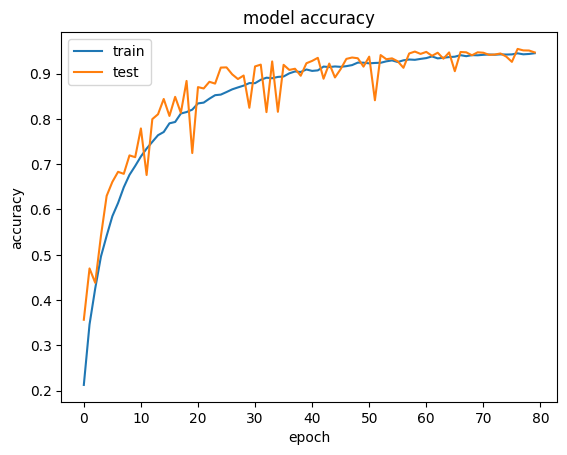

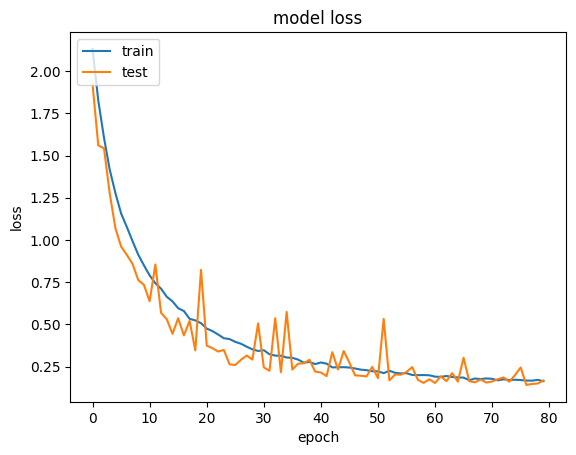

In [30]:
#Testing
score = model.evaluate(input_X_test, output_Y_test, batch_size=BATCH_SIZE, verbose=VERBOSE)
print("\nTest score/loss:", score[0])
print('Test accuracy:', score[1])

# list all data in history
print(history.history.keys())

# summarize history for accuracy
#plt.plot(mo)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [31]:
# Dropot = 0.5

# REUSE THE SAME INITIALISATION CODE AND THE TRAINING AND TEST DATA SET LOADING OPERATION

N_EPOCH = 40

# Complex DNN model definition
model = Sequential()
 
model.add(Conv2D(32, kernel_size=3, padding='same', input_shape=(IMG_ROWS, IMG_COLS, IMG_CHANNELS)))
model.add(Activation('relu'))
model.add(Conv2D(32, kernel_size=3, padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))
 
model.add(Conv2D(64, kernel_size=3, padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
 
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(N_CLASSES))
model.add(Activation('softmax'))


#optim = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=OPTIM, metrics=['accuracy'])

model.summary()
 


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 activation_23 (Activation)  (None, 32, 32, 32)        0         
                                                                 
 conv2d_15 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 activation_24 (Activation)  (None, 32, 32, 32)        0         
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 16, 16, 32)        0         
 g2D)                                                            
                                                                 
 dropout_13 (Dropout)        (None, 16, 16, 32)        0         
                                                      

In [32]:
# training/fitting of the complex DNN model 
history = model.fit(input_X_train, output_Y_train, batch_size=BATCH_SIZE, epochs=N_EPOCH, validation_split=VALIDATION_SPLIT,  verbose=VERBOSE)

Epoch 1/40
134/134 [==============================] - 10s 70ms/step - loss: 2.1186 - accuracy: 0.2107 - val_loss: 1.8523 - val_accuracy: 0.3276
Epoch 2/40
134/134 [==============================] - 9s 70ms/step - loss: 1.8567 - accuracy: 0.3295 - val_loss: 1.6261 - val_accuracy: 0.4077
Epoch 3/40
134/134 [==============================] - 9s 69ms/step - loss: 1.6574 - accuracy: 0.4103 - val_loss: 1.4601 - val_accuracy: 0.4800
Epoch 4/40
134/134 [==============================] - 10s 71ms/step - loss: 1.5011 - accuracy: 0.4649 - val_loss: 1.3315 - val_accuracy: 0.5198
Epoch 5/40
134/134 [==============================] - 10s 72ms/step - loss: 1.3733 - accuracy: 0.5090 - val_loss: 1.1360 - val_accuracy: 0.6092
Epoch 6/40
134/134 [==============================] - 10s 75ms/step - loss: 1.2600 - accuracy: 0.5463 - val_loss: 1.0456 - val_accuracy: 0.6377
Epoch 7/40
134/134 [==============================] - 10s 74ms/step - loss: 1.1726 - accuracy: 0.5819 - val_loss: 0.9299 - val_accuracy: 0

42/42 [==============================] - 1s 19ms/step - loss: 0.2576 - accuracy: 0.9126

Test score/loss: 0.2576441764831543
Test accuracy: 0.9125632047653198
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


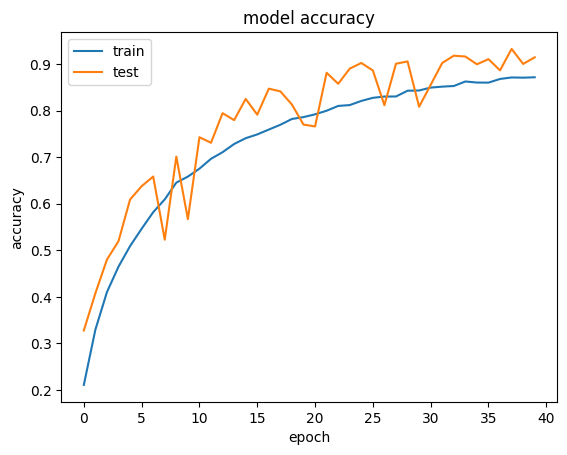

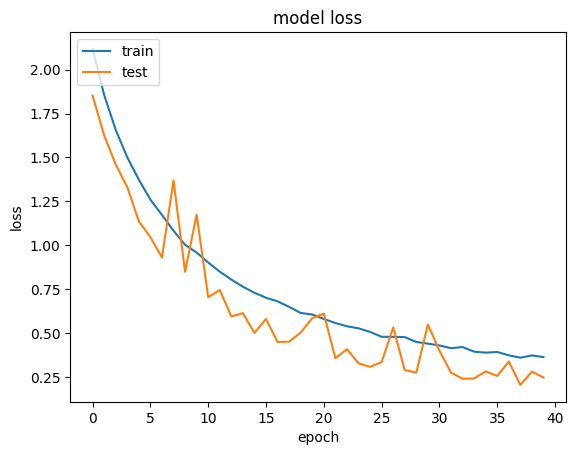

In [33]:
#Testing
score = model.evaluate(input_X_test, output_Y_test, batch_size=BATCH_SIZE, verbose=VERBOSE)
print("\nTest score/loss:", score[0])
print('Test accuracy:', score[1])

# list all data in history
print(history.history.keys())

# summarize history for accuracy
#plt.plot(mo)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [34]:
# Dropot = 0.0

# REUSE THE SAME INITIALISATION CODE AND THE TRAINING AND TEST DATA SET LOADING OPERATION

N_EPOCH = 40

# Complex DNN model definition
model = Sequential()
 
model.add(Conv2D(32, kernel_size=3, padding='same', input_shape=(IMG_ROWS, IMG_COLS, IMG_CHANNELS)))
model.add(Activation('relu'))
model.add(Conv2D(32, kernel_size=3, padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.0))
 
model.add(Conv2D(64, kernel_size=3, padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
 
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(N_CLASSES))
model.add(Activation('softmax'))


#optim = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=OPTIM, metrics=['accuracy'])

model.summary()
 


Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 activation_29 (Activation)  (None, 32, 32, 32)        0         
                                                                 
 conv2d_19 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 activation_30 (Activation)  (None, 32, 32, 32)        0         
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 16, 16, 32)        0         
 ng2D)                                                           
                                                                 
 dropout_16 (Dropout)        (None, 16, 16, 32)        0         
                                                      

In [35]:
# training/fitting of the complex DNN model 
history = model.fit(input_X_train, output_Y_train, batch_size=BATCH_SIZE, epochs=N_EPOCH, validation_split=VALIDATION_SPLIT,  verbose=VERBOSE)

Epoch 1/40
134/134 [==============================] - 9s 68ms/step - loss: 2.1133 - accuracy: 0.2207 - val_loss: 1.8517 - val_accuracy: 0.3562
Epoch 2/40
134/134 [==============================] - 10s 73ms/step - loss: 1.8086 - accuracy: 0.3588 - val_loss: 1.6282 - val_accuracy: 0.4030
Epoch 3/40
134/134 [==============================] - 9s 66ms/step - loss: 1.5941 - accuracy: 0.4338 - val_loss: 1.4380 - val_accuracy: 0.4910
Epoch 4/40
134/134 [==============================] - 9s 67ms/step - loss: 1.4339 - accuracy: 0.4910 - val_loss: 1.1835 - val_accuracy: 0.5862
Epoch 5/40
134/134 [==============================] - 9s 67ms/step - loss: 1.2828 - accuracy: 0.5455 - val_loss: 1.0992 - val_accuracy: 0.6129
Epoch 6/40
134/134 [==============================] - 9s 67ms/step - loss: 1.1730 - accuracy: 0.5809 - val_loss: 1.0803 - val_accuracy: 0.6174
Epoch 7/40
134/134 [==============================] - 9s 67ms/step - loss: 1.0681 - accuracy: 0.6175 - val_loss: 0.8391 - val_accuracy: 0.712

42/42 [==============================] - 1s 20ms/step - loss: 0.3571 - accuracy: 0.8920

Test score/loss: 0.3571018874645233
Test accuracy: 0.8919677734375
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


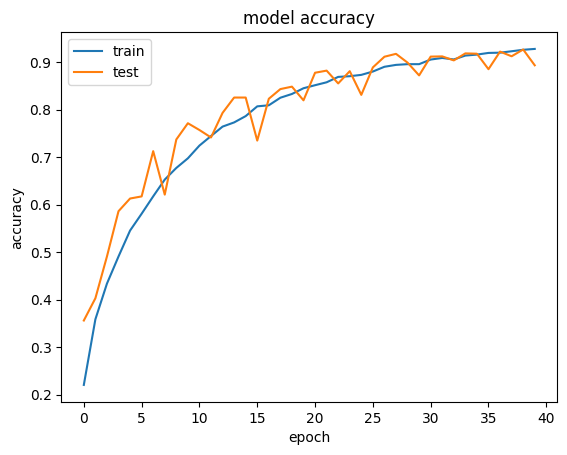

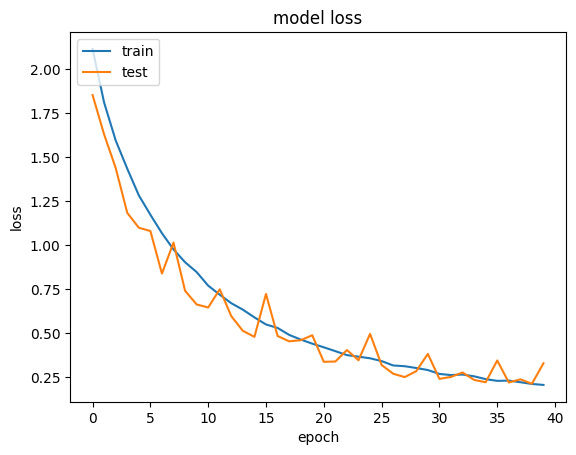

In [36]:
#Testing
score = model.evaluate(input_X_test, output_Y_test, batch_size=BATCH_SIZE, verbose=VERBOSE)
print("\nTest score/loss:", score[0])
print('Test accuracy:', score[1])

# list all data in history
print(history.history.keys())

# summarize history for accuracy
#plt.plot(mo)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [37]:
# Dropot = 0.0, 0.0

# REUSE THE SAME INITIALISATION CODE AND THE TRAINING AND TEST DATA SET LOADING OPERATION

N_EPOCH = 40

# Complex DNN model definition
model = Sequential()
 
model.add(Conv2D(32, kernel_size=3, padding='same', input_shape=(IMG_ROWS, IMG_COLS, IMG_CHANNELS)))
model.add(Activation('relu'))
model.add(Conv2D(32, kernel_size=3, padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.0))
 
model.add(Conv2D(64, kernel_size=3, padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.0))
 
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(N_CLASSES))
model.add(Activation('softmax'))


#optim = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=OPTIM, metrics=['accuracy'])

model.summary()
 


Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_22 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 activation_35 (Activation)  (None, 32, 32, 32)        0         
                                                                 
 conv2d_23 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 activation_36 (Activation)  (None, 32, 32, 32)        0         
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 16, 16, 32)        0         
 ng2D)                                                           
                                                                 
 dropout_19 (Dropout)        (None, 16, 16, 32)        0         
                                                      

In [38]:
# training/fitting of the complex DNN model 
history = model.fit(input_X_train, output_Y_train, batch_size=BATCH_SIZE, epochs=N_EPOCH, validation_split=VALIDATION_SPLIT,  verbose=VERBOSE)

Epoch 1/40
134/134 [==============================] - 10s 71ms/step - loss: 2.1020 - accuracy: 0.2300 - val_loss: 2.0237 - val_accuracy: 0.2745
Epoch 2/40
134/134 [==============================] - 9s 64ms/step - loss: 1.7622 - accuracy: 0.3733 - val_loss: 1.6118 - val_accuracy: 0.4297
Epoch 3/40
134/134 [==============================] - 9s 65ms/step - loss: 1.5110 - accuracy: 0.4653 - val_loss: 1.3163 - val_accuracy: 0.5333
Epoch 4/40
134/134 [==============================] - 9s 66ms/step - loss: 1.3199 - accuracy: 0.5321 - val_loss: 1.1628 - val_accuracy: 0.5897
Epoch 5/40
134/134 [==============================] - 9s 67ms/step - loss: 1.1413 - accuracy: 0.5961 - val_loss: 1.4235 - val_accuracy: 0.5212
Epoch 6/40
134/134 [==============================] - 9s 70ms/step - loss: 1.0003 - accuracy: 0.6477 - val_loss: 0.8419 - val_accuracy: 0.7056
Epoch 7/40
134/134 [==============================] - 9s 69ms/step - loss: 0.8770 - accuracy: 0.6888 - val_loss: 0.7716 - val_accuracy: 0.729

42/42 [==============================] - 1s 19ms/step - loss: 0.3886 - accuracy: 0.9083

Test score/loss: 0.3885900676250458
Test accuracy: 0.9082568883895874
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


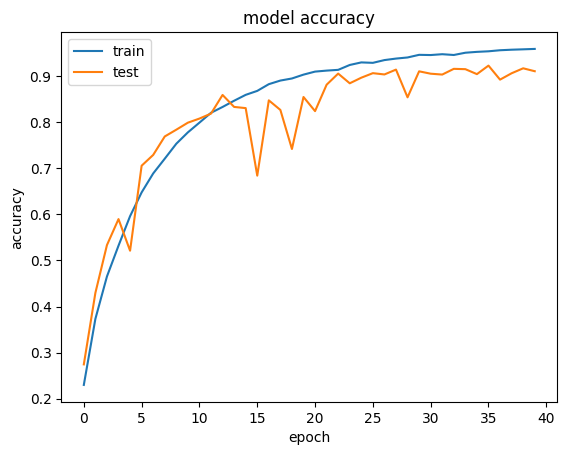

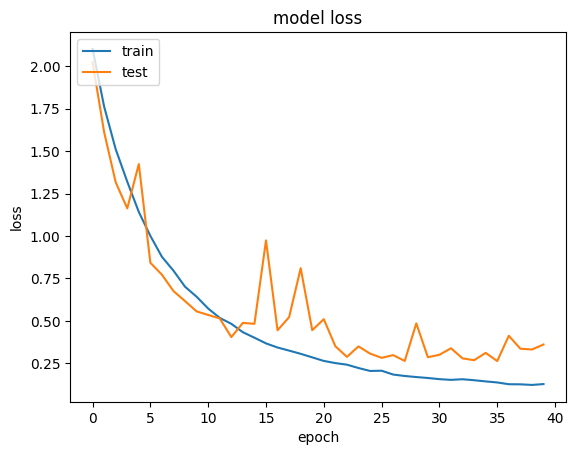

In [39]:
#Testing
score = model.evaluate(input_X_test, output_Y_test, batch_size=BATCH_SIZE, verbose=VERBOSE)
print("\nTest score/loss:", score[0])
print('Test accuracy:', score[1])

# list all data in history
print(history.history.keys())

# summarize history for accuracy
#plt.plot(mo)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [40]:
# Tanh Activation

# REUSE THE SAME INITIALISATION CODE AND THE TRAINING AND TEST DATA SET LOADING OPERATION

N_EPOCH = 40

# Complex DNN model definition
model = Sequential()
 
model.add(Conv2D(32, kernel_size=3, padding='same', input_shape=(IMG_ROWS, IMG_COLS, IMG_CHANNELS)))
model.add(Activation('tanh'))
model.add(Conv2D(32, kernel_size=3, padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
 
model.add(Conv2D(64, kernel_size=3, padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
 
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(N_CLASSES))
model.add(Activation('softmax'))


#optim = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=OPTIM, metrics=['accuracy'])

model.summary()
 


Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_26 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 activation_41 (Activation)  (None, 32, 32, 32)        0         
                                                                 
 conv2d_27 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 activation_42 (Activation)  (None, 32, 32, 32)        0         
                                                                 
 max_pooling2d_14 (MaxPooli  (None, 16, 16, 32)        0         
 ng2D)                                                           
                                                                 
 dropout_22 (Dropout)        (None, 16, 16, 32)        0         
                                                      

In [41]:
# training/fitting of the complex DNN model 
history = model.fit(input_X_train, output_Y_train, batch_size=BATCH_SIZE, epochs=N_EPOCH, validation_split=VALIDATION_SPLIT,  verbose=VERBOSE)

Epoch 1/40
134/134 [==============================] - 10s 74ms/step - loss: 2.1089 - accuracy: 0.2234 - val_loss: 1.8324 - val_accuracy: 0.3946
Epoch 2/40
134/134 [==============================] - 9s 68ms/step - loss: 1.7606 - accuracy: 0.3676 - val_loss: 1.4350 - val_accuracy: 0.5088
Epoch 3/40
134/134 [==============================] - 9s 69ms/step - loss: 1.5235 - accuracy: 0.4560 - val_loss: 1.2047 - val_accuracy: 0.5961
Epoch 4/40
134/134 [==============================] - 10s 72ms/step - loss: 1.3334 - accuracy: 0.5248 - val_loss: 1.3050 - val_accuracy: 0.5181
Epoch 5/40
134/134 [==============================] - 9s 69ms/step - loss: 1.1930 - accuracy: 0.5796 - val_loss: 0.9888 - val_accuracy: 0.6508
Epoch 6/40
134/134 [==============================] - 9s 70ms/step - loss: 1.0978 - accuracy: 0.6065 - val_loss: 0.8513 - val_accuracy: 0.7138
Epoch 7/40
134/134 [==============================] - 9s 70ms/step - loss: 0.9943 - accuracy: 0.6507 - val_loss: 0.9027 - val_accuracy: 0.66

42/42 [==============================] - 1s 19ms/step - loss: 0.2695 - accuracy: 0.9101

Test score/loss: 0.2694593369960785
Test accuracy: 0.910129189491272
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


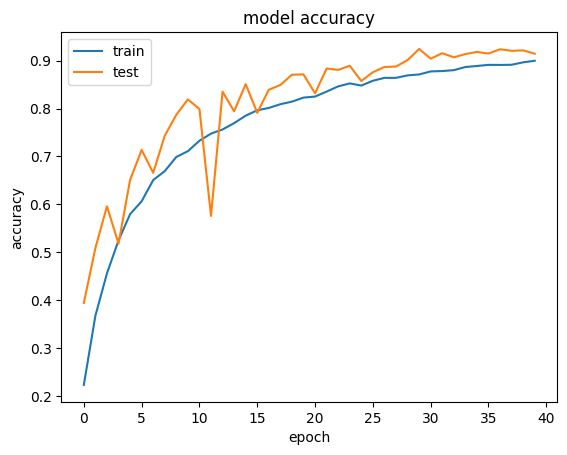

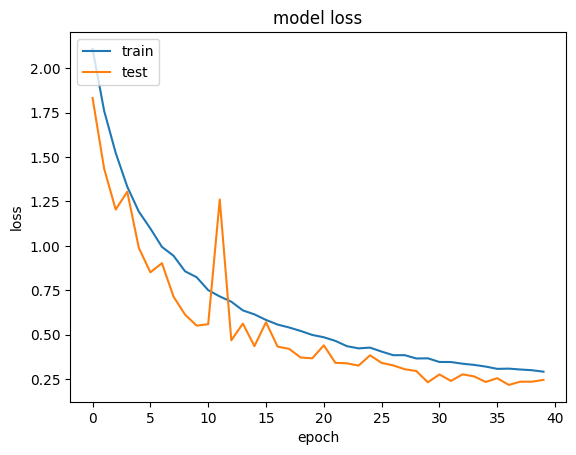

In [42]:
#Testing
score = model.evaluate(input_X_test, output_Y_test, batch_size=BATCH_SIZE, verbose=VERBOSE)
print("\nTest score/loss:", score[0])
print('Test accuracy:', score[1])

# list all data in history
print(history.history.keys())

# summarize history for accuracy
#plt.plot(mo)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [43]:
# sigmoid Activation

# REUSE THE SAME INITIALISATION CODE AND THE TRAINING AND TEST DATA SET LOADING OPERATION

N_EPOCH = 40

# Complex DNN model definition
model = Sequential()
 
model.add(Conv2D(32, kernel_size=3, padding='same', input_shape=(IMG_ROWS, IMG_COLS, IMG_CHANNELS)))
model.add(Activation('sigmoid'))
model.add(Conv2D(32, kernel_size=3, padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
 
model.add(Conv2D(64, kernel_size=3, padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
 
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(N_CLASSES))
model.add(Activation('softmax'))


#optim = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=OPTIM, metrics=['accuracy'])

model.summary()
 


Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_30 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 activation_47 (Activation)  (None, 32, 32, 32)        0         
                                                                 
 conv2d_31 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 activation_48 (Activation)  (None, 32, 32, 32)        0         
                                                                 
 max_pooling2d_16 (MaxPooli  (None, 16, 16, 32)        0         
 ng2D)                                                           
                                                                 
 dropout_25 (Dropout)        (None, 16, 16, 32)        0         
                                                      

In [44]:
# training/fitting of the complex DNN model 
history = model.fit(input_X_train, output_Y_train, batch_size=BATCH_SIZE, epochs=N_EPOCH, validation_split=VALIDATION_SPLIT,  verbose=VERBOSE)

Epoch 1/40
134/134 [==============================] - 10s 74ms/step - loss: 2.2608 - accuracy: 0.1436 - val_loss: 2.1062 - val_accuracy: 0.2326
Epoch 2/40
134/134 [==============================] - 9s 68ms/step - loss: 2.1113 - accuracy: 0.2318 - val_loss: 2.1208 - val_accuracy: 0.2226
Epoch 3/40
134/134 [==============================] - 10s 74ms/step - loss: 1.9891 - accuracy: 0.2833 - val_loss: 1.8996 - val_accuracy: 0.3293
Epoch 4/40
134/134 [==============================] - 9s 70ms/step - loss: 1.8901 - accuracy: 0.3265 - val_loss: 1.9401 - val_accuracy: 0.2909
Epoch 5/40
134/134 [==============================] - 9s 69ms/step - loss: 1.8129 - accuracy: 0.3581 - val_loss: 1.6596 - val_accuracy: 0.4187
Epoch 6/40
134/134 [==============================] - 9s 70ms/step - loss: 1.7330 - accuracy: 0.3865 - val_loss: 1.5770 - val_accuracy: 0.4383
Epoch 7/40
134/134 [==============================] - 10s 72ms/step - loss: 1.6674 - accuracy: 0.4120 - val_loss: 1.5051 - val_accuracy: 0.4

42/42 [==============================] - 1s 20ms/step - loss: 0.7455 - accuracy: 0.7633

Test score/loss: 0.7455310225486755
Test accuracy: 0.763340175151825
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


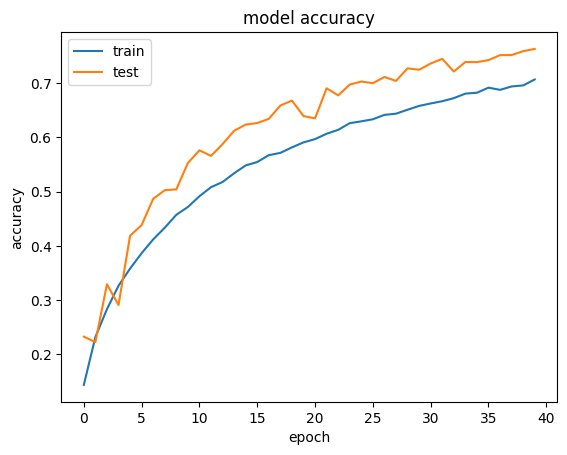

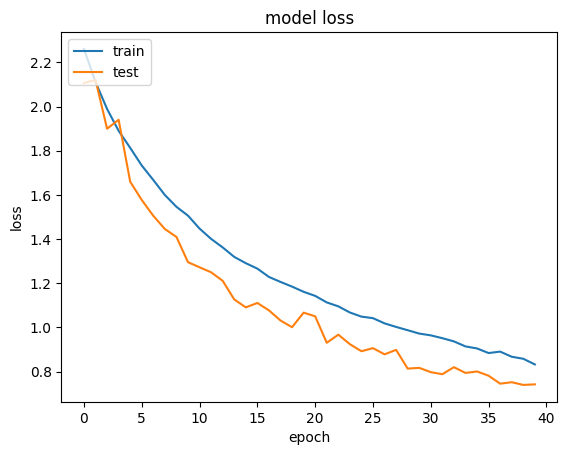

In [45]:
#Testing
score = model.evaluate(input_X_test, output_Y_test, batch_size=BATCH_SIZE, verbose=VERBOSE)
print("\nTest score/loss:", score[0])
print('Test accuracy:', score[1])

# list all data in history
print(history.history.keys())

# summarize history for accuracy
#plt.plot(mo)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()